### Exercise 1:

Complete the following code. Sample 10, 100, and 1000 samples from exponential distribution. Compute ECDF for each sample. For each sample also plot 0.25, 0.5 and 0.75-quantile. Retrieve the maximum L1 error from the original distribution CDF (between samples and original distribution).

Sample 0 max_error: 0.30964469248328597
Sample 1 max_error: 0.08477467572251463
Sample 2 max_error: 0.017531899971172327


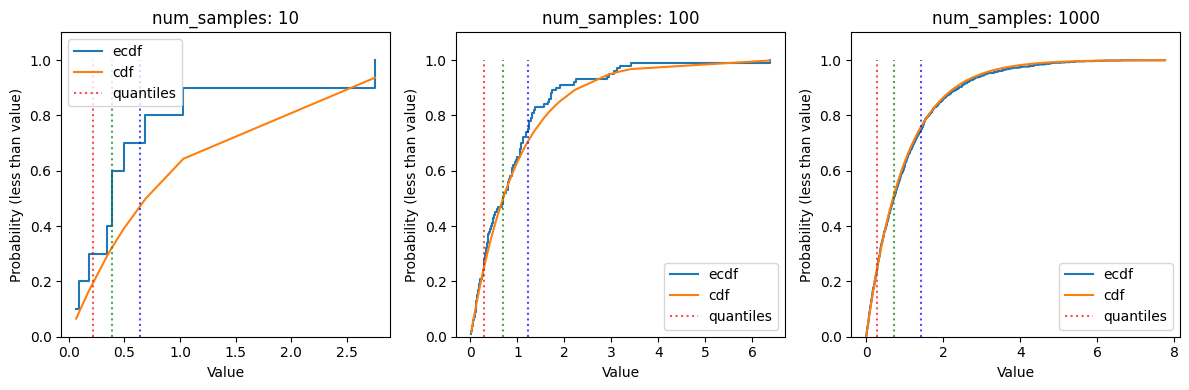

In [1]:
## Solution 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Define silly_ecdf function
def silly_ecdf(data):
    x = np.unique(data)
    y = []
    for item in x:
        y.append(np.sum(data <= item))
    y = np.array(y, dtype=float)
    y /= len(data)
    return x, y

# Define plot_ecdf_with_quantiles function
def plot_ecdf_with_quantiles(data, dist_cdf, label='ECDF'):
    x, y = silly_ecdf(data)
    quantiles = np.percentile(data, [25, 50, 75])

    plt.step(x, y, where='post', label='ecdf')
    plt.plot(x, dist_cdf(x), label='cdf')
    plt.vlines(quantiles, ymin=0, ymax=1, linestyles='dotted', colors=['r', 'g', 'b'], alpha=0.7, label='quantiles')
    plt.ylim(0, 1.1)
    plt.xlabel('Value')
    plt.ylabel('Probability (less than value)')
    plt.legend()
    plt.title(f'num_samples: {len(data)}')

# Define max_l1_error function
def max_l1_error(data, dist_cdf):
    x, y = silly_ecdf(data)
    y_true = dist_cdf(x)
    l1_error = np.abs(y - y_true).max()
    return l1_error

# Sample sizes
sample_sizes = [10, 100, 1000]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Sample data from exponential distribution and plot ECDF with quantiles
for i, n in enumerate(sample_sizes):
    data = np.random.exponential(scale=1.0, size=n)
    plt.sca(axes[i])
    plot_ecdf_with_quantiles(data, expon.cdf, label=f'ECDF (n={n})')
    l1_error = max_l1_error(data, expon.cdf)
    print(f'Sample {i} max_error: {l1_error}')

plt.tight_layout()
plt.show()



In [3]:
# Assert statements for verification
def assert_statements():

    example_data = np.random.exponential(scale=1.0, size=100)

    # Assert for silly_ecdf
    x, y = silly_ecdf(example_data)
    assert isinstance(example_data, np.ndarray), "Input data must be a NumPy array"
    assert len(x) == len(y), "Output arrays x and y must have the same length"
    assert np.all(np.diff(y) >= 0), "ECDF values must be non-decreasing"
    assert y[-1] == 1, "The last value of ECDF must be 1"

    # Assert for plot_ecdf_with_quantiles
    dist_cdf = expon.cdf
    assert isinstance(example_data, np.ndarray), "Input data must be a NumPy array"
    assert callable(dist_cdf), "dist_cdf must be a callable function"
    x, y = silly_ecdf(example_data)
    quantiles = np.percentile(example_data, [25, 50, 75])
    assert len(quantiles) == 3, "Quantiles must contain exactly three values"

    # Assert for max_l1_error
    l1_error = max_l1_error(example_data, dist_cdf)
    assert isinstance(example_data, np.ndarray), "Input data must be a NumPy array"
    assert callable(dist_cdf), "dist_cdf must be a callable function"
    assert l1_error >= 0, "L1 error must be non-negative"

assert_statements()

### Exercise 2:

Complete the following code.Plot 2d-histogram of probability bounds for $n$ and $\epsilon$ ranges specified in the code cell. Draw a conclusion about decision boundary for $n$ and $\epsilon$.

In [4]:
n_min = 1
n_max = 1000
n_size = 1000

eps_min = 0.01
eps_max = 0.2
eps_size = 1000

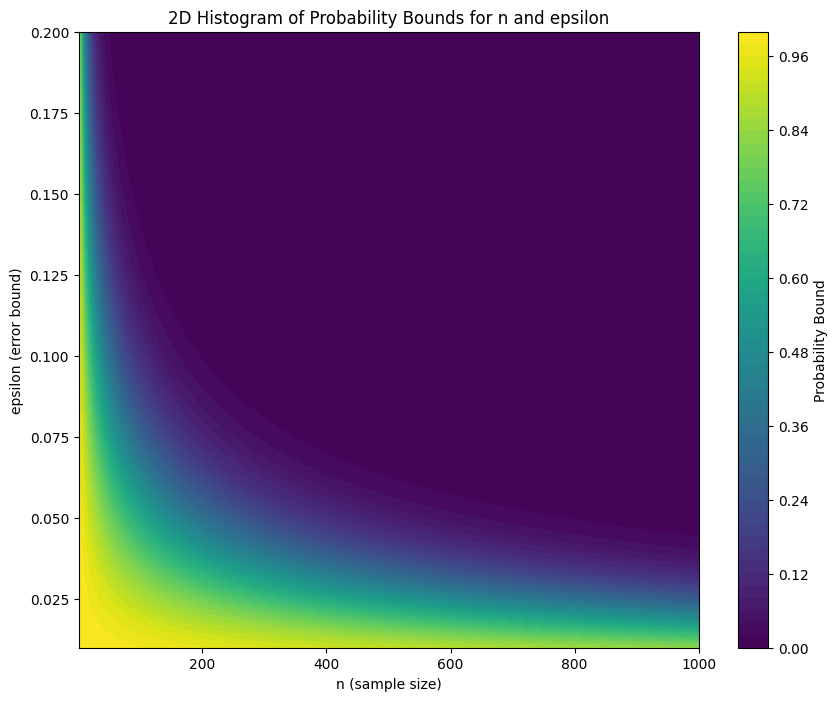

Decision boundary where probability bound is <= 0.05: 0.04999757307431723


In [6]:

# Generate ranges for n and epsilon
n_values = np.linspace(n_min, n_max, n_size)
eps_values = np.linspace(eps_min, eps_max, eps_size)

# Create meshgrid
n_grid, eps_grid = np.meshgrid(n_values, eps_values)

# Compute probability bounds
prob_bounds = raw_dkw(n_grid, eps_grid)

# Plotting the 2D histogram
plt.figure(figsize=(10, 8))
plt.contourf(n_grid, eps_grid, prob_bounds, levels=50, cmap='viridis')
plt.colorbar(label='Probability Bound')
plt.xlabel('n (sample size)')
plt.ylabel('epsilon (error bound)')
plt.title('2D Histogram of Probability Bounds for n and epsilon')
plt.show()

# Draw conclusion about decision boundary for n and epsilon
decision_boundary = np.max(prob_bounds[prob_bounds <= 0.05])

print(f"Decision boundary where probability bound is <= 0.05: {decision_boundary}")


In [8]:
# Assert statements for verification
def assert_statements():
    # Assert for ranges
    assert n_min < n_max, "n_min should be less than n_max"
    assert eps_min < eps_max, "eps_min should be less than eps_max"
    assert n_size > 0, "n_size should be greater than 0"
    assert eps_size > 0, "eps_size should be greater than 0"

    # Assert for generated ranges
    assert len(n_values) == n_size, "n_values should have length equal to n_size"
    assert len(eps_values) == eps_size, "eps_values should have length equal to eps_size"

    # Assert for meshgrid
    assert n_grid.shape == (eps_size, n_size), "n_grid shape should be (eps_size, n_size)"
    assert eps_grid.shape == (eps_size, n_size), "eps_grid shape should be (eps_size, n_size)"

    # Assert for probability bounds
    assert prob_bounds.shape == (eps_size, n_size), "prob_bounds shape should be (eps_size, n_size)"
    assert np.all(prob_bounds >= 0) and np.all(prob_bounds <= 1), "prob_bounds values should be between 0 and 1"

    # Assert for decision boundary
    assert decision_boundary <= 0.05, "decision_boundary should be less than or equal to 0.05"

assert_statements()

### Exercise 3:

Complete the following code. You want to relocate from Russia to another country of your choice. Check whether your favorite product will cost as same as in Russia. (Perform ks test, obviously.)

> [Data description](https://www.kaggle.com/datasets/mvieira101/global-cost-of-living?select=cost-of-living_v2.csv)


In [ ]:
import pandas as pd

cost_of_living = pd.read_csv("cost-of-living_v2.csv")

cost_of_living

,city,country,x1,x2,x3,x4,x5,x6,x7,x8,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,Seoul,South Korea,7.68,53.78,6.15,3.07,4.99,3.93,1.48,0.79,...,110.36,742.54,557.52,2669.12,1731.08,22067.70,10971.90,2689.62,3.47,1
1,Shanghai,China,5.69,39.86,5.69,1.14,4.27,3.98,0.53,0.33,...,123.51,1091.93,569.88,2952.70,1561.59,17746.11,9416.35,1419.87,5.03,1
2,Guangzhou,China,4.13,28.47,4.98,0.85,1.71,3.54,0.44,0.33,...,43.89,533.28,317.45,1242.24,688.05,12892.82,5427.45,1211.68,5.19,1
3,Mumbai,India,3.68,18.42,3.68,2.46,4.30,2.48,0.48,0.19,...,41.17,522.40,294.05,1411.12,699.80,6092.45,2777.51,640.81,7.96,1
4,Delhi,India,4.91,22.11,4.30,1.84,3.68,1.77,0.49,0.19,...,36.50,229.84,135.31,601.02,329.15,2506.73,1036.74,586.46,8.06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4951,Peterborough,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4952,Georgetown,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4953,Ixtapa Zihuatanejo,Mexico,5.16,30.94,12.89,0.98,NaN,1.80,0.62,0.41,...,103.14,412.55,257.84,515.69,412.55,NaN,NaN,NaN,NaN,0
4954,Iqaluit,Canada,29.65,74.27,13.71,6.67,8.89,3.71,3.52,4.08,...,NaN,NaN,NaN,2964.60,2964.60,NaN,NaN,NaN,6.53,0


In [26]:

# Select a product:
product = 'x1'  # Update this to the actual product you are interested in


# Filter the data for Russia and another country of your choice (example: 'United States')
russia_data = cost_of_living[cost_of_living['country'] == 'Russia'][product].dropna()
other_country_data = cost_of_living[cost_of_living['country'] == 'United States'][product].dropna()

# Perform KS test
ks_statistic, p_value = ks_2samp(russia_data, other_country_data)

# 0.05 level of significance
alpha = 0.05

# Print the KS test results
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")




KS Statistic: 0.6069892674170749
P-value: 1.1139730943852777e-37


In [27]:
# Assert statements for verification
def assert_statements():
    # Assert for valid KS test results
    assert 0 <= ks_statistic <= 1, "KS statistic should be between 0 and 1"
    assert 0 <= p_value <= 1, "P-value should be between 0 and 1"

assert_statements()

### Exercise 4:

Complete the following code. For the following data showing the age at diagnosis of type II diabetes in young adults, test the following hypotheses using normal approximation:

$H_0:$ The age at diagnosis is the same for males and females

$H_1:$ The age at diagnosis is different for males and females

In [29]:
diabete_diagnosis_data = [('male', 19), ('male', 22), ('male', 16), ('male', 29), ('male', 24),
                          ('female', 20), ('female', 11), ('female', 17), ('female', 12)]

In [31]:
# Separate male and female data
male_data = [age for gender, age in diabete_diagnosis_data if gender == 'male']
female_data = [age for gender, age in diabete_diagnosis_data if gender == 'female']

# Calculate U-test statistic (using a library for convenience)
U_test, _ = mannwhitneyu(male_data, female_data, alternative='two-sided')

# Number of males and females
n_m = len(male_data)
n_f = len(female_data)

# Calculate z-score
z = (U_test - n_m*n_f/2)/(np.sqrt((n_m*n_f*(n_m+n_f+1))/12))
print(z)

1.7146428199482247


In [32]:
# Assert statement to check if z-score is a valid number
assert not np.isnan(z), "z-score calculation resulted in NaN (Not a Number)"

The one-tailed p-value for this z is $0.044$, therefore, for the two-tailed test the p-value for the found $z$ is approximately $0.09$

$0.09>0.05$, that is why we cannot reject the null hypothesis.

Using the scipy library we got the results that also support non-rejection of the null hypothesis.

In [ ]:
from scipy.stats import mannwhitneyu

U1, p = mannwhitneyu(diagnosis_df.loc[diagnosis_df['gender']=='male', ['age']],
                     diagnosis_df.loc[diagnosis_df['gender']=='female', ['age']], method="exact")
p[0]

0.1111111111111111

### Exercise 5:

Let's take worldwide happiness score (the data can be found [here](https://www.kaggle.com/datasets/unsdsn/world-happiness)), collected in 2015 and 2019, and test the following hypotheses:

$H_0:$ The central tendency is equal

$H_1:$ The central tendency is not equal (two-sided case) $\alpha=0.05$

Use a normal approximation of $W$.

In [38]:
chosen_columns = ["Country", "Happiness Score", "Freedom"]

wh_2015 = pd.read_csv("/content/2015.csv")[
    ["Country", "Happiness Score", "Freedom"]
]

rename_map = {
    "Country or region": "Country",
    "Score": "Happiness Score",
    "Freedom to make life choices": "Freedom",
}

wh_2019 = pd.read_csv("/content/2019.csv")[
    ["Country or region", "Score", "Freedom to make life choices"]
].rename(columns=rename_map)

wh_2015_2019 = wh_2015.merge(wh_2019, on=["Country"], suffixes=("_2015", "_2019"))
wh_2015_2019

,Country,Happiness Score_2015,Freedom_2015,Happiness Score_2019,Freedom_2019
0,Switzerland,7.587,0.66557,7.480,0.572
1,Iceland,7.561,0.62877,7.494,0.591
2,Denmark,7.527,0.64938,7.600,0.592
3,Norway,7.522,0.66973,7.554,0.603
4,Canada,7.427,0.63297,7.278,0.584
...,...,...,...,...,...
144,Rwanda,3.465,0.59201,3.334,0.555
145,Benin,3.340,0.48450,4.883,0.349
146,Syria,3.006,0.15684,3.462,0.013
147,Burundi,2.905,0.11850,3.775,0.220


In [36]:
target = "Freedom"

In [77]:
#Solution 5

# Extract the Freedom scores for 2015 and 2019
freedom_2015 = wh_2015_2019[f"{target}_2015"]
freedom_2019 = wh_2015_2019[f"{target}_2019"]

# Calculate the differences
differences = freedom_2019 - freedom_2015

# Calculate ranks of the absolute differences
ranks = np.abs(differences).rank()

# Calculate T+ and T- using the ranks
T_positive = ranks[differences > 0].sum()
T_negative = ranks[differences < 0].sum()
W = min(T_positive, T_negative)


print(f"T-: {T_negative}, T+: {T_positive}, W: {W}")


T-: 8204.5, T+: 2970.5, W: 2970.5


In [78]:
# Assert for valid T+, T-, and W values
assert T_positive >= 0, "T+ should be non-negative"
assert T_negative >= 0, "T- should be non-negative"
assert W == T_positive or W == T_negative, "W should be the minimum of T+ and T-"

In [79]:
#Solution 5

# Calculate the expected value (mean) and variance of W
n = len(differences)
expected_w = n * (n + 1) / 4
variance_w = n * (n + 1) * (2 * n + 1) / 24

print('Mean = {} and variance={}'.format(expected_w, variance_w))

Mean = 5587.5 and variance=278443.75


In [80]:
# Add assertion statements here to check properties of the calculated values
assert expected_w > 0, "Expected value of W should be positive"
assert variance_w > 0, "Variance of W should be positive"

In [81]:
# Print values before calculating Z
print("W:", W)
print("Expected W:", expected_w)
print("Variance of W:", variance_w)

W: 2970.5
Expected W: 5587.5
Variance of W: 278443.75


In [82]:
Z = (W - expected_w) / np.sqrt(variance_w)
print("Z-statistic:", Z)

Z-statistic: -4.959466780309037


In [85]:
# Assert for z-value
assert abs(z) <= 100, "Z-statistic is unusually large"

Z-value of $-4.9594$ gives us yields a p-value that is $\le .00001$.
So we reject a null hypothesis. Thus, The central tendency of worldwide happiness score in 2015 and 2019 is not equal.

In [86]:
from scipy.stats import wilcoxon

res = wilcoxon(
    wh_2015_2019[f"{target}_2015"], wh_2015_2019[f"{target}_2019"], method="approx"
)
res

WilcoxonResult(statistic=2970.5, pvalue=7.068652878069502e-07)

In [87]:
assert res.pvalue < alpha, "Failed to reject null hypothesis (no significant difference)"

### Exercise 6:

Complete the following code. Complete the following code. Vladimir has tested the performance of two different search engines and recorded their scores. Using the Kruskal-Wallis test:



1.   Formulate the hypothesis you able to test;
2.   Test these hypotheses and draw the conclusion on the work of two different search engines.

You can see the data below

In [96]:
# Import necessary libraries
import pandas as pd
import scipy.stats as stats

# Load the data
seard_df = pd.read_csv('search.csv')
print(seard_df)

     simple_search  super_duper_bert_search
0         0.697898                 0.772413
1         0.686611                 0.739866
2         0.249121                 0.790170
3         0.400000                 0.560799
4         0.613381                 0.056897
..             ...                      ...
220       0.543007                 0.275589
221       0.536454                 0.771297
222       0.562810                 0.454294
223       0.476189                 0.608744
224       0.571487                 0.624483

[225 rows x 2 columns]


In [98]:
# Separate the scores for the two search engines
simple_search_scores = seard_df['simple_search']
super_duper_bert_search_scores = seard_df['super_duper_bert_search']

# Formulate the hypotheses
# Null Hypothesis (H0): The performance scores of the two search engines come from the same distribution.
# Alternative Hypothesis (H1): The performance scores of the two search engines come from different distributions.

# Perform the Kruskal-Wallis test
stat, p_value = stats.kruskal(simple_search_scores, super_duper_bert_search_scores)
print(f"Kruskal-Wallis H-statistic: {stat}")
print(f"P-value: {p_value}")

# Conclusion based on the p-value
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis: The distributions of scores are different between the two search engines."
else:
    conclusion = "Fail to reject the null hypothesis: The distributions of scores are the same between the two search engines."

print(conclusion)

# Additional information
print("\nSummary Statistics:")
print(f"Simple Search - Count: {len(simple_search_scores)}, Mean: {simple_search_scores.mean()}, Std: {simple_search_scores.std()}")
print(f"Super Duper BERT Search - Count: {len(super_duper_bert_search_scores)}, Mean: {super_duper_bert_search_scores.mean()}, Std: {super_duper_bert_search_scores.std()}")


Kruskal-Wallis H-statistic: 33.901805525878935
P-value: 5.79648827984181e-09
Reject the null hypothesis: The distributions of scores are different between the two search engines.

Summary Statistics:
Simple Search - Count: 225, Mean: 0.35553663160045323, Std: 0.25004704350756757
Super Duper BERT Search - Count: 225, Mean: 0.4893616189631929, Std: 0.2309767733500408


In [99]:
# Assert statements for verification
def assert_statements():
    # Assert for non-empty data
    assert not simple_search_scores.empty, "Simple Search scores should not be empty"
    assert not super_duper_bert_search_scores.empty, "Super Duper BERT Search scores should not be empty"

    # Assert for valid Kruskal-Wallis test results
    assert stat >= 0, "Kruskal-Wallis statistic should be non-negative"
    assert 0 <= p_value <= 1, "P-value should be between 0 and 1"

    # Additional asserts for the size of data
    assert len(simple_search_scores) > 1, "Simple Search should have more than one score"
    assert len(super_duper_bert_search_scores) > 1, "Super Duper BERT Search should have more than one score"